<a href="https://colab.research.google.com/github/d22cs051/Leaning-DL/blob/main/pytorch_exercises%20/Copy_of_04_pytorch_custom_datasets_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. PyTorch Custom Datasets Exercises Template

Welcome to the 04. PyTorch Custom Datasets exercise template.

The best way to practice PyTorch code is to write more PyTorch code.

So read the original notebook and try to complete the exercises by writing code where it's required.

Feel free to reference the original resources whenever you need but should practice writing all of the code yourself.

## Resources

1. These exercises/solutions are based on [notebook 04 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/04_pytorch_custom_datasets/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/vsFMF9wqWx0).
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Mon Jan 16 05:25:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

1.13.0+cu116


'cuda'

## 1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

## 2. Recreate the data loading functions we built in [sections 1, 2, 3 and 4 of notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/). You should have train and test `DataLoader`'s ready to use.

In [3]:
# 1. Get data
# data url:- https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip

url = "https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip"
import requests
from pathlib import Path
import zipfile

# making paths for the data
data_path = Path("data")
img_path = data_path / "pizza_stake_sushi"

# creating the required dirs.
# if img_path.is_dir():
  # print("Directory already exits")
# else:
# print("no data folder is found!!, creating one..")
img_path.mkdir(parents=True,exist_ok=True)
# getting data from the url
res = requests.get(url)
# checking response
print(f"status_code: {res.status_code}")
if res.status_code == 200:
  print("downloading the data...")
  with open(img_path/"pizza_stake_sushi.zip","wb") as f:
    f.write(res.content)
    zip_file_path = img_path/"pizza_stake_sushi.zip"
  with zipfile.ZipFile(zip_file_path,"r") as zipfile:
    print("Extracting file")
    zipfile.extractall(img_path)
    print(f"All file extracted to {img_path}")
else:
  print(f"GOT NO RESPONSE FROM URL: {url}")

status_code: 200
downloading the data...
Extracting file
All file extracted to data/pizza_stake_sushi


In [4]:
# 2. Become one with the data
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning file counts of its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [5]:
# Setup train and testing paths
train_path = img_path/"train"
test_path = img_path/"test"

print(f"walkin the path: {train_path}")
walk_through_dir(train_path)

print(f"walkin the path: {test_path}")
walk_through_dir(test_path)

walkin the path: data/pizza_stake_sushi/train
There are 3 directories and 0 images in 'data/pizza_stake_sushi/train'.
There are 0 directories and 72 images in 'data/pizza_stake_sushi/train/sushi'.
There are 0 directories and 78 images in 'data/pizza_stake_sushi/train/pizza'.
There are 0 directories and 75 images in 'data/pizza_stake_sushi/train/steak'.
walkin the path: data/pizza_stake_sushi/test
There are 3 directories and 0 images in 'data/pizza_stake_sushi/test'.
There are 0 directories and 31 images in 'data/pizza_stake_sushi/test/sushi'.
There are 0 directories and 25 images in 'data/pizza_stake_sushi/test/pizza'.
There are 0 directories and 19 images in 'data/pizza_stake_sushi/test/steak'.


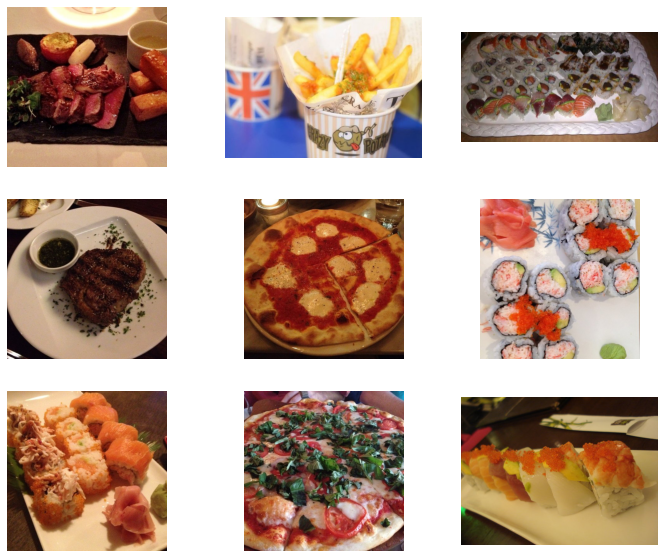

In [6]:
# Visualize the images
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
all_train_images = list(train_path.glob("*/*.jpg"))

r,c = 3,3
index = torch.randint(0,len(all_train_images),(r*c,))
plt.figure(figsize=(12,10))
for i in range(0,r*c):
  plt.subplot(r,c,i+1)
  image = Image.open(all_train_images[index[i]])
  plt.imshow(np.asarray(image))
  plt.axis("off")
plt.show()

We've got some images in our folders.

Now we need to make them compatible with PyTorch by:
1. Transform the data into tensors.
2. Turn the tensor data into a `torch.utils.data.Dataset` and later a `torch.utils.data.DataLoader`.

In [7]:
# 3.1 Transforming data with torchvision.transforms
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [8]:
# Write transform for turning images into tensors

image_transform = transforms.Compose([
    transforms.Resize(size=(64,64)), # resizing image
    transforms.RandomHorizontalFlip(p=0.5), # appling horizontal flip with prob = 0.5
    transforms.ToTensor() # converting to tensor
])

image_transform

Compose(
    Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
)

In [9]:
# Write a function to plot transformed images

def plot_transformed_image(image:torch.Tensor = None):
  plt.figure(figsize=(10,7))
  plt.imshow(image.permute(1,2,0))
  plt.axis("off")
  plt.show()

### Load image data using `ImageFolder`

In [10]:
# Use ImageFolder to create dataset(s)
# train dataset
train_data = datasets.ImageFolder(
    root=train_path,
    transform = image_transform, 
)

# test dataset
test_data = datasets.ImageFolder(
    root=test_path,
    transform = image_transform, 
)
train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_stake_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ), Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_stake_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [11]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [12]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [13]:
# Check the lengths of each dataset
len(train_data), len(test_data)

(225, 75)

In [14]:
# Turn train and test Datasets into DataLoaders
import os

BATCH_SIZE = 10

# train dataloader
train_dataloader = DataLoader(
    dataset = train_data,
    batch_size = BATCH_SIZE,
    num_workers=os.cpu_count()
    )

# test dataloader
test_dataloader = DataLoader(
    dataset = test_data,
    batch_size = BATCH_SIZE,
    num_workers=os.cpu_count()
    )
print(train_dataloader.dataset)
print(test_dataloader.dataset)

Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_stake_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_stake_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [15]:
# How many batches of images are in our data loaders?
print(f"batches in train_dataloader: {len(train_dataloader)}")
print(f"batches in test_dataloader: {len(test_dataloader)}")

batches in train_dataloader: 23
batches in test_dataloader: 8


## 3. Recreate `model_0` we built in section 7 of notebook 04.

In [16]:
from torch import nn

In [17]:
class TinyVGG(nn.Module):
  """
  Model architecture copying TinyVGG from: 
  https://poloclub.github.io/cnn-explainer/
  """
  def __init__(self,in_shape,hidden_units,out_shape):
    super().__init__()
    # block 1
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(
            in_channels=in_shape,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1
        ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1
        ),
        nn.ReLU(),
        nn.MaxPool2d(
            kernel_size=2,
            stride=2,
        )
    )
    # block 2
    self.conv_block_2 = nn.Sequential(
          nn.Conv2d(
              in_channels=hidden_units,
              out_channels=hidden_units,
              kernel_size=3,
              stride=1
          ),
          nn.ReLU(),
          nn.Conv2d(
              in_channels=hidden_units,
              out_channels=hidden_units,
              kernel_size=3,
              stride=1
          ),
          nn.ReLU(),
          nn.MaxPool2d(
              kernel_size=2,
              stride=2,
          )
      )
    # block 3 (clf)
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(
            in_features = 13*13*hidden_units,
            out_features=out_shape
            )
    )

  def forward(self,x:torch.Tensor):
    x = self.conv_block_1(x)
    # print(f"output conv_block_1 shape: {x.shape}")
    x = self.conv_block_2(x)
    # print(f"output conv_block_2 shape: {x.shape}")
    x = self.classifier(x)
    # print(f"output classifier shape: {x.shape}")
    return x

In [18]:
model_0 = TinyVGG(in_shape=3,hidden_units=10,out_shape=3).to(device=device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

## 4. Create training and testing functions for `model_0`.

In [19]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
  
  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader and data batches
  for (x,y) in dataloader:
    # Send data to target device
    x,y = x.to(device),y.to(device)
    # 1. Forward pass
    y_pred_logits = model(x)
    # 2. Calculate and accumulate loss
    loss = loss_fn(y_pred_logits,y)
    train_loss += loss
    # 3. Optimizer zero grad 
    optimizer.zero_grad()

    # 4. Loss backward 
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate and accumualte accuracy metric across all batches
    train_acc += (torch.sum(y_pred_logits.argmax(dim=1) == y))/len(y)

  # Adjust metrics to get average loss and average accuracy per batch
  return train_loss / len(dataloader),train_acc / len(dataloader)

In [20]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
  
  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
    # Loop through DataLoader batches
    for (x,y) in dataloader:
      # Send data to target device
      x,y = x.to(device),y.to(device)

      # 1. Forward pass
      y_pred_logits = model(x)

      # 2. Calculuate and accumulate loss
      loss = loss_fn(y_pred_logits,y)
      test_loss += loss
      # Calculate and accumulate accuracy
      test_acc += (torch.sum(y_pred_logits.argmax(dim=1) == y))/len(y)
    
  # Adjust metrics to get average loss and accuracy per batch
  return test_loss / len(dataloader),test_acc / len(dataloader)

In [21]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
  
  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model, 
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model, 
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)
    
    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

## 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?
* Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer. 

In [22]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), 
                             lr=0.001)

train(model=model_0,train_dataloader=train_dataloader,test_dataloader=test_dataloader,optimizer=optimizer,loss_fn=loss_fn,epochs=5)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.5498 | train_acc: 0.2957 | test_loss: 1.1989 | test_acc: 0.2500
Epoch: 2 | train_loss: 1.0853 | train_acc: 0.3261 | test_loss: 1.1238 | test_acc: 0.2375
Epoch: 3 | train_loss: 1.1193 | train_acc: 0.3261 | test_loss: 1.1063 | test_acc: 0.2375
Epoch: 4 | train_loss: 1.1151 | train_acc: 0.3261 | test_loss: 1.1018 | test_acc: 0.2375
Epoch: 5 | train_loss: 1.1103 | train_acc: 0.1478 | test_loss: 1.0996 | test_acc: 0.2375


{'train_loss': [tensor(1.5498, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0853, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.1193, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.1151, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.1103, device='cuda:0', grad_fn=<DivBackward0>)],
 'train_acc': [tensor(0.2957, device='cuda:0'),
  tensor(0.3261, device='cuda:0'),
  tensor(0.3261, device='cuda:0'),
  tensor(0.3261, device='cuda:0'),
  tensor(0.1478, device='cuda:0')],
 'test_loss': [tensor(1.1989, device='cuda:0'),
  tensor(1.1238, device='cuda:0'),
  tensor(1.1063, device='cuda:0'),
  tensor(1.1018, device='cuda:0'),
  tensor(1.0996, device='cuda:0')],
 'test_acc': [tensor(0.2500, device='cuda:0'),
  tensor(0.2375, device='cuda:0'),
  tensor(0.2375, device='cuda:0'),
  tensor(0.2375, device='cuda:0'),
  tensor(0.2375, device='cuda:0')]}

In [23]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), 
                             lr=0.001)
train(model=model_0,train_dataloader=train_dataloader,test_dataloader=test_dataloader,optimizer=optimizer,loss_fn=loss_fn,epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1982 | train_acc: 0.2522 | test_loss: 1.1208 | test_acc: 0.3125
Epoch: 2 | train_loss: 1.0970 | train_acc: 0.3391 | test_loss: 1.1022 | test_acc: 0.2375
Epoch: 3 | train_loss: 1.1002 | train_acc: 0.0652 | test_loss: 1.0992 | test_acc: 0.2375
Epoch: 4 | train_loss: 1.1005 | train_acc: 0.1870 | test_loss: 1.0983 | test_acc: 0.4500
Epoch: 5 | train_loss: 1.1004 | train_acc: 0.1609 | test_loss: 1.0979 | test_acc: 0.4500
Epoch: 6 | train_loss: 1.1000 | train_acc: 0.3348 | test_loss: 1.0977 | test_acc: 0.4500
Epoch: 7 | train_loss: 1.1001 | train_acc: 0.3348 | test_loss: 1.0977 | test_acc: 0.4500
Epoch: 8 | train_loss: 1.1001 | train_acc: 0.3348 | test_loss: 1.0977 | test_acc: 0.4500
Epoch: 9 | train_loss: 1.1001 | train_acc: 0.3348 | test_loss: 1.0977 | test_acc: 0.4500
Epoch: 10 | train_loss: 1.1001 | train_acc: 0.3348 | test_loss: 1.0976 | test_acc: 0.4500
Epoch: 11 | train_loss: 1.1000 | train_acc: 0.3348 | test_loss: 1.0976 | test_acc: 0.4500
Epoch: 12 | train_l

{'train_loss': [tensor(1.1982, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0970, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.1002, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.1005, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.1004, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.1000, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.1001, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.1001, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.1001, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.1001, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.1000, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.1000, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.1000, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.1000, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.1000, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.1000, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.1000, device='cuda:0', grad_fn=

In [24]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), 
                             lr=0.001)
train(model=model_0,train_dataloader=train_dataloader,test_dataloader=test_dataloader,optimizer=optimizer,loss_fn=loss_fn,epochs=50)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1026 | train_acc: 0.0348 | test_loss: 1.0988 | test_acc: 0.3125
Epoch: 2 | train_loss: 1.1000 | train_acc: 0.3391 | test_loss: 1.0989 | test_acc: 0.3125
Epoch: 3 | train_loss: 1.0999 | train_acc: 0.3391 | test_loss: 1.0988 | test_acc: 0.3125
Epoch: 4 | train_loss: 1.0999 | train_acc: 0.3391 | test_loss: 1.0988 | test_acc: 0.3125
Epoch: 5 | train_loss: 1.0999 | train_acc: 0.3391 | test_loss: 1.0987 | test_acc: 0.3125
Epoch: 6 | train_loss: 1.0999 | train_acc: 0.3391 | test_loss: 1.0987 | test_acc: 0.3125
Epoch: 7 | train_loss: 1.0999 | train_acc: 0.3391 | test_loss: 1.0987 | test_acc: 0.3125
Epoch: 8 | train_loss: 1.0999 | train_acc: 0.3391 | test_loss: 1.0986 | test_acc: 0.3125
Epoch: 9 | train_loss: 1.0999 | train_acc: 0.3391 | test_loss: 1.0986 | test_acc: 0.3125
Epoch: 10 | train_loss: 1.0999 | train_acc: 0.3391 | test_loss: 1.0986 | test_acc: 0.3125
Epoch: 11 | train_loss: 1.0999 | train_acc: 0.3391 | test_loss: 1.0985 | test_acc: 0.3125
Epoch: 12 | train_l

{'train_loss': [tensor(1.1026, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.1000, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0999, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0999, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0999, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0999, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0999, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0999, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0999, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0999, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0999, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0999, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0999, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0999, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0999, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0999, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0998, device='cuda:0', grad_fn=

It looks like our model is starting to overfit towards the end (performing far better on the training data than on the testing data).

In order to fix this, we'd have to introduce ways of preventing overfitting.

## 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [25]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_1 = TinyVGG(
    in_shape = 3,
    hidden_units = 20,
    out_shape = 3
).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(
    params = model_1.parameters(),
    lr = 0.001
)

train(model = model_1,train_dataloader=train_dataloader,test_dataloader=test_dataloader,optimizer = optimizer,loss_fn=loss_fn,epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.4354 | train_acc: 0.2957 | test_loss: 1.1618 | test_acc: 0.2375
Epoch: 2 | train_loss: 1.0965 | train_acc: 0.3261 | test_loss: 1.1219 | test_acc: 0.2375
Epoch: 3 | train_loss: 1.1146 | train_acc: 0.3261 | test_loss: 1.1100 | test_acc: 0.2375
Epoch: 4 | train_loss: 1.1080 | train_acc: 0.3261 | test_loss: 1.1045 | test_acc: 0.2375
Epoch: 5 | train_loss: 1.1044 | train_acc: 0.3261 | test_loss: 1.1017 | test_acc: 0.2375
Epoch: 6 | train_loss: 1.1039 | train_acc: 0.3261 | test_loss: 1.1316 | test_acc: 0.2375
Epoch: 7 | train_loss: 1.1686 | train_acc: 0.0478 | test_loss: 1.1036 | test_acc: 0.2375
Epoch: 8 | train_loss: 1.1066 | train_acc: 0.0652 | test_loss: 1.1010 | test_acc: 0.2375
Epoch: 9 | train_loss: 1.1019 | train_acc: 0.0304 | test_loss: 1.0991 | test_acc: 0.2375
Epoch: 10 | train_loss: 1.0999 | train_acc: 0.2348 | test_loss: 1.0985 | test_acc: 0.3125
Epoch: 11 | train_loss: 1.0999 | train_acc: 0.3000 | test_loss: 1.0985 | test_acc: 0.3500
Epoch: 12 | train_l

{'train_loss': [tensor(1.4354, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0965, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.1146, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.1080, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.1044, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.1039, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.1686, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.1066, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.1019, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0999, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0999, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0998, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0998, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0997, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0997, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0993, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0995, device='cuda:0', grad_fn=

It looks like the model is still overfitting, even when changing the number of hidden units.

To fix this, we'd have to look at ways to prevent overfitting with our model.

## 7. Double the data you're using with your model from step 6 and train it for 20 epochs, what happens to the results?
* **Note:** You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
* You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.

In [26]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
  # "https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip"
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...") 
    zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi_20_percent directory, creating one...
Unzipping pizza, steak, sushi 20% data...


In [27]:
# See how many images we have
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/test'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/sushi'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/pizza'.
There are 0 directories and 58 images in 'data/pizza_steak_sushi_20_percent/test/steak'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/train'.
There are 0 directories and 150 images in 'data/pizza_steak_sushi_20_percent/train/sushi'.
There are 0 directories and 154 images in 'data/pizza_steak_sushi_20_percent/train/pizza'.
There are 0 directories and 146 images in 'data/pizza_steak_sushi_20_percent/train/steak'.


Excellent, we now have double the training and testing images... 

In [28]:
# Create the train and test paths
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

(PosixPath('data/pizza_steak_sushi_20_percent/train'),
 PosixPath('data/pizza_steak_sushi_20_percent/test'))

In [34]:
# Turn the 20 percent datapaths into Datasets and DataLoaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader
import os

simple_transform = transforms.Compose([
  transforms.Resize((64, 64)),                                     
  transforms.ToTensor()
])

# Create datasets
train_data_20_percent = ImageFolder(
    root=train_data_20_percent_path,
    transform=image_transform
)

test_data_20_percent = ImageFolder(
    root=test_data_20_percent_path,
    transform = image_transform
)
# Create dataloaders
BATCH_SIZE = 32
CPU_COUNT = os.cpu_count()

train_dataloader_20_percent = DataLoader(
    dataset=train_data_20_percent,
    batch_size = BATCH_SIZE,
    shuffle=True,
    num_workers = CPU_COUNT
)

test_dataloader_20_percent = DataLoader(
    dataset=test_data_20_percent,
    batch_size = BATCH_SIZE,
    num_workers = CPU_COUNT
)

train_dataloader_20_percent.dataset,test_dataloader_20_percent.dataset

(Dataset ImageFolder
     Number of datapoints: 450
     Root location: data/pizza_steak_sushi_20_percent/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ), Dataset ImageFolder
     Number of datapoints: 150
     Root location: data/pizza_steak_sushi_20_percent/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [35]:
print(f"NO. of Batches in train dataloader: {len(train_dataloader_20_percent)}")
print(f"NO. of Batches in test dataloader: {len(test_dataloader_20_percent)}")

NO. of Batches in train dataloader: 15
NO. of Batches in test dataloader: 5


In [39]:
# Train a model with increased amount of data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

class_names = train_dataloader.dataset.classes
model_2 = TinyVGG(
    in_shape=3,
    hidden_units=10,
    out_shape = len(class_names)
).to(device)

model_2

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [40]:
# setting up loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(
    params = model_2.parameters(),
    lr = 0.001
)

EPOCHS = 20

train(
    model=model_2,
    train_dataloader=train_dataloader_20_percent,
    test_dataloader=test_dataloader_20_percent,
    optimizer=optimizer,
    loss_fn=loss_fn,
    epochs=EPOCHS
    )

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1045 | train_acc: 0.3167 | test_loss: 1.0960 | test_acc: 0.2938
Epoch: 2 | train_loss: 1.0882 | train_acc: 0.4083 | test_loss: 1.0701 | test_acc: 0.4352
Epoch: 3 | train_loss: 1.0455 | train_acc: 0.4958 | test_loss: 1.0253 | test_acc: 0.4665
Epoch: 4 | train_loss: 0.9577 | train_acc: 0.5354 | test_loss: 0.9907 | test_acc: 0.5205
Epoch: 5 | train_loss: 0.9753 | train_acc: 0.5063 | test_loss: 0.9342 | test_acc: 0.5290
Epoch: 6 | train_loss: 0.8760 | train_acc: 0.5833 | test_loss: 0.9508 | test_acc: 0.4869
Epoch: 7 | train_loss: 0.9350 | train_acc: 0.6063 | test_loss: 0.9403 | test_acc: 0.5733
Epoch: 8 | train_loss: 0.9161 | train_acc: 0.5833 | test_loss: 0.9140 | test_acc: 0.6256
Epoch: 9 | train_loss: 0.8874 | train_acc: 0.5917 | test_loss: 0.9118 | test_acc: 0.5790
Epoch: 10 | train_loss: 0.8891 | train_acc: 0.5938 | test_loss: 0.9175 | test_acc: 0.6006
Epoch: 11 | train_loss: 0.8867 | train_acc: 0.5938 | test_loss: 0.9108 | test_acc: 0.5699
Epoch: 12 | train_l

{'train_loss': [tensor(1.1045, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0882, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0455, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.9577, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.9753, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.8760, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.9350, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.9161, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.8874, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.8891, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.8867, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.8461, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.8844, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.8440, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.8181, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.8309, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.8185, device='cuda:0', grad_fn=

## 8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) with your trained model from exercise 7 and share your prediction. 
* Does the model you trained in exercise 7 get it right? 
* If not, what do you think you could do to improve it?

In [58]:
# getting food image from internet
url = "https://res.cloudinary.com/purnesh/image/upload/w_540,f_auto,q_auto:eco,c_limit/hungercrush-247717959-830198887656216-7155700612332509360-n1.jpg"

import requests
from pathlib import Path
import zipfile

# making paths for the data
data_path = Path("data")
img_path = data_path / "pizza_stake_sushi"

# creating the required dirs.
# if img_path.is_dir():
  # print("Directory already exits")
# else:
# print("no data folder is found!!, creating one..")
img_path.mkdir(parents=True,exist_ok=True)
# getting data from the url
res = requests.get(url)
# checking response
print(f"status_code: {res.status_code}")
if res.status_code == 200:
  print("downloading the data...")
  with open(data_path/"custom_image.jpg","wb") as f:
    f.write(res.content)
else:
  print(f"GOT NO RESPONSE FROM URL: {url}")

status_code: 200
downloading the data...


In [88]:
import torchvision
from torchvision.io import read_image
from torchvision import transforms
import matplotlib.pyplot as plt

def predict_on_custom_image(src:str,model:nn.Module):
  # reading image
  input_image = read_image(str(src)) #converting to str is src is posix path in [C,H,W] config

  # transforming the input image to tensor
  custom_image_tranform = transforms.Resize(size=(64,64))
  resized_input_image = custom_image_tranform(input_image)

  # adding batch dimension & sending to device
  tranformed_input_image = resized_input_image.type(torch.float32).unsqueeze(dim=0).to(device)
  # print(tranformed_input_image.shape)

  # making prediction
  preds_logits = model(tranformed_input_image)
  # plotting_result
  plt.figure(figsize=(10,8))
  plt.imshow(resized_input_image.permute(1,2,0))
  plt.title(class_names[preds_logits.argmax(dim=1)] + " | actual = Pizza")
  plt.axis("off")
  plt.show()
  print("Result:- " +class_names[preds_logits.argmax(dim=1)] + " | actual = Pizza")
  return nn.Softmax(dim=1)(preds_logits)

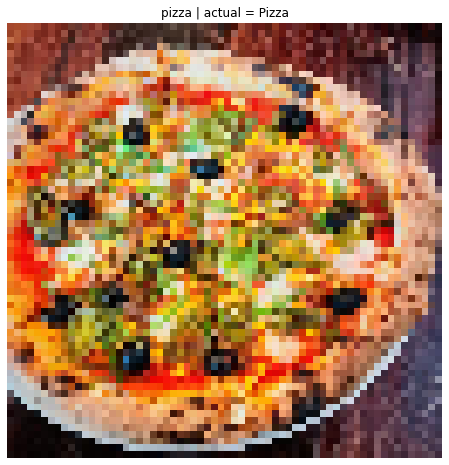

Result:- pizza | actual = Pizza


In [89]:

image_path = data_path/"custom_image.jpg"
preds_prob = predict_on_custom_image(src=image_path,model=model_2)
